In [135]:
# !ollama pull llama3.2-vision:11b

In [134]:
# !pip install ollama-ocr

In [185]:
import ollama
from ollama import chat
from ollama_ocr import OCRProcessor

In [186]:
import os

In [187]:
# for visualisation
from IPython.display import Image, display, Markdown

In [188]:
llm = 'llama3.2-vision'

In [ ]:
project_root = os.getcwd()  # get directory

# use path to the image
image_path = os.path.join("Image", "britain_population.jpeg")
file1 = os.path.join(project_root, image_path)


In [190]:
def explain(path):
    response = ollama.chat(
        model=llm, 
        messages=[{
            'role': 'user',
            'content': 'Can you explain what is on this image?',
            'images': [path]
        }]
    )
    return response['message']['content']

In [198]:
result = explain(file1)
result

' Sure, I can extract the data from the image you\'ve provided:\n\n| Country       | Population in 1821   | Population in 2019   |\n|------------------|-------------------|--------------------------|\n| England          | 6587                  | 53,03,463                |\n| Scotland           | 3467                  | 52,308,357                |\n| Ireland            | 1865                   | N/A (not specified)  |\n| Wales              | 2667                  | 3,094,125                |\n\nPlease note that the data for Ireland is not fully visible in the image and I\'ve marked it as "N/A" because of the lack of information. For Scotland, the population number includes Northern Scotland, which was a part of England until the late 20th century. The population of Northern Scotland would typically be included with the rest of Scotland but has been separated out in this image for some reason.\n\nThe "Scotland" figure in 1821 reflects only the Lowlands (present-day Scotland excluding the

In [192]:
# Create an instance
ocr = OCRProcessor(model_name=llm)

In [194]:
def explain(image_path):
    response = ollama.chat(
        model='llava',
        messages=[{
            'role': 'user',
            'content': (
                'this is image is of the population of the british isles in the years 1821 and 2019'
                'left side is for year 1821 and the right is for 2019'
                'under each country name is a number describing what the population of the country is'
                'extract the data and display it in a table.'
            ),
            'images': [image_path]
        }]
    )
    return response['message']['content']


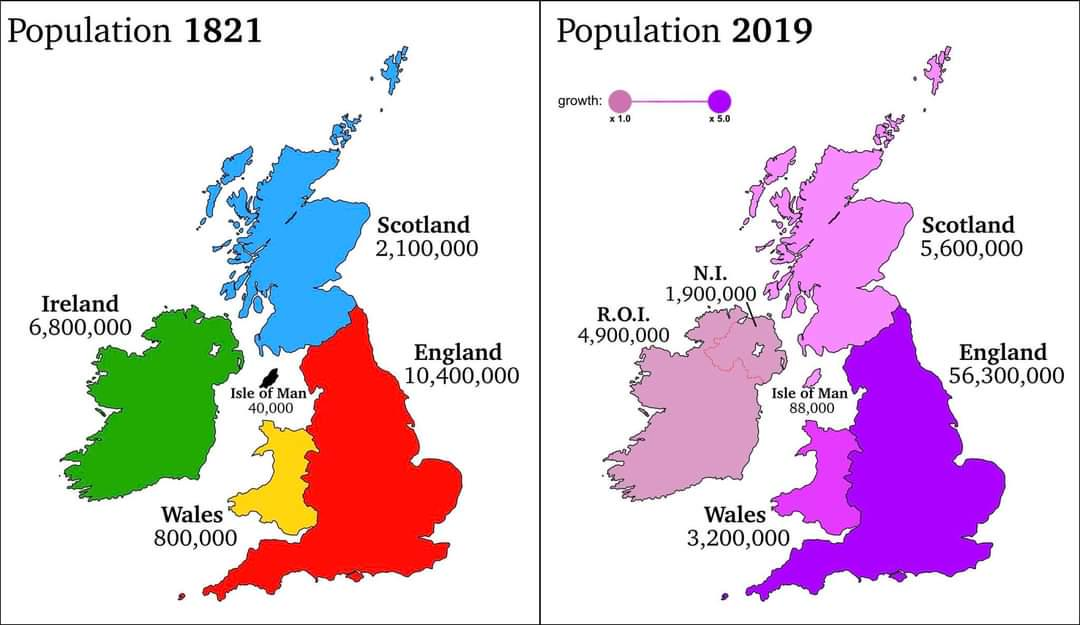

In [195]:
# Display the image
display(Image(filename=file1, width=400))

In [196]:
response = explain(file1)
response

' The image provided shows two maps, one for the year 1821 and the other for the year 2019, indicating the population of various regions within the British Isles. Here are the populations as indicated by the numbers on each map:\n\n| Year | Population                   |\n| --- | ---                             |\n| 1821 | Scotland - 2 million               |\n|          | England - 6 million              |\n|          | Wales - 100,000                            |\n|          | Ireland (Northern Ireland) - 300,000           |\n|          | Total: 8.6 million                      |\n| 2019 | Scotland - 5.46 million               |\n|          | England - 55.78 million              |\n|          | Wales - 3.08 million                            |\n|          | Northern Ireland - 1.88 million           |\n|          | Total: 60.82 million                      |\n\nPlease note that the population numbers are estimates and may vary slightly from the actual figures. Additionally, the image 

In [197]:
display(Markdown(response))

 The image provided shows two maps, one for the year 1821 and the other for the year 2019, indicating the population of various regions within the British Isles. Here are the populations as indicated by the numbers on each map:

| Year | Population                   |
| --- | ---                             |
| 1821 | Scotland - 2 million               |
|          | England - 6 million              |
|          | Wales - 100,000                            |
|          | Ireland (Northern Ireland) - 300,000           |
|          | Total: 8.6 million                      |
| 2019 | Scotland - 5.46 million               |
|          | England - 55.78 million              |
|          | Wales - 3.08 million                            |
|          | Northern Ireland - 1.88 million           |
|          | Total: 60.82 million                      |

Please note that the population numbers are estimates and may vary slightly from the actual figures. Additionally, the image does not provide data for the Republic of Ireland (Southern Ireland), which was not part of the United Kingdom in 1821 but is part of it since 1922. 